In [1]:
import os

parent, folder = os.path.split(os.getcwd())
if folder == "report":
    os.chdir(parent)

In [2]:
import matplotlib.pyplot as plt
import numpy

from optimize import BrentNumericalRecipes, OptimizeResult
from utils import OptimizeParameters
from oracle import unimodal, continuous, Oracle
from main import test_optimize

%matplotlib inline

In [3]:
def build_plot(optimize_result: OptimizeResult, oracle: Oracle) -> None:
    errors = [numpy.log10(abs(oracle.get_x_min() - i)) for i in optimize_result.optimize_history]

    plt.plot(errors)
    plt.title(f"f(x)={oracle.get_name()}")
    plt.ylabel("error")
    plt.xlabel("iteration")
    plt.grid(True)

In [4]:
brent = BrentNumericalRecipes(20)

# Анализ работы алгоритма Брента с использованием производной

В качестве анализа работы алгоритма рассмотрим несколько функций, часть из которых унимодальные, а часть просто непрерывные.

Для каждой функции построим график зависимости точности от числа итераций.
За точность будем обозначать модуль разности настоящего минимума и полученного алгоритмом к текущей итерации:

\begin{equation*}
\text{error}_i = \log(| x_i - x^* |)
\end{equation*}

## Унимодальные функции

1. \begin{equation*}
f(x) = -(16x^2 - 24x + 5) \cdot e^{-x}
\end{equation*}

In [5]:
oracle_1 = unimodal.Function4()
left_bound_1 = 0
right_bound_1 = 10
optimize_result_1 = brent.brent_with_derivatives(
    oracle_1.get_oracle(), left_bound_1, right_bound_1, oracle_1.get_eps()
)

График функции:

<img src="../../images/1_problem04.png" width="500px">

Зависимость ошибки от числа итераций:

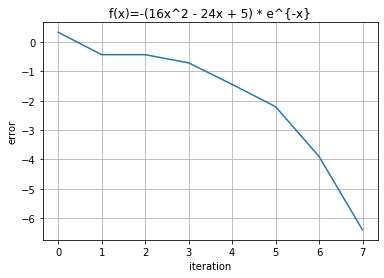

In [6]:
build_plot(optimize_result_1, oracle_1)
plt.show()

In [7]:
f_x_min_1, df_x_min_1 = oracle_1.get_oracle()(optimize_result_1.x_min)
print(
    f"x_min = {optimize_result_1.x_min}\n"
    f"f(x_min) = {f_x_min_1}\n"
    f"df(x_min) = {df_x_min_1}"
)

x_min = 2.868034401933168
f(x_min) = -3.850450708800046
df(x_min) = 8.881784197001252e-07


2. \begin{equation*}
f(x) = -x^{2/3} - (1 - x^2)^{1/3}
\end{equation*}

In [8]:
oracle_2 = unimodal.Function13()
left_bound_2 = 0
right_bound_2 = 10
optimize_result_2 = brent.brent_with_derivatives(
    oracle_2.get_oracle(), left_bound_2, right_bound_2, oracle_2.get_eps()
)

График функции:

<img src="../../images/1_problem13.png" width="500px">

Зависимость ошибки от числа итераций:

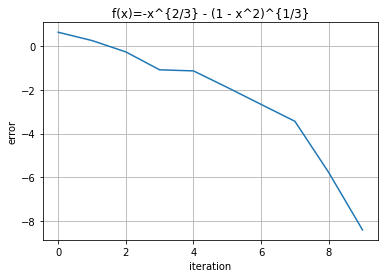

In [9]:
build_plot(optimize_result_2, oracle_2)
plt.show()

In [10]:
f_x_min_2, df_x_min_2 = oracle_2.get_oracle()(optimize_result_2.x_min)
print(
    f"x_min = {optimize_result_2.x_min}\n"
    f"f(x_min) = {f_x_min_2}\n"
    f"df(x_min) = {df_x_min_2}"
)

x_min = 0.7071067772594175
f(x_min) = -1.5874010519681994
df(x_min) = 0.0


Для унимодальных функции удалось найти минимум с помощью реализованного алгоритма.

## Непрерывные функции

Проверим удаётся ли найти локальный минимум на отрезке для непрерывных функций.

1. \begin{equation*}
f(x) = \sin(x) + \sin(\frac{10}{3}x)
\end{equation*}

In [11]:
oracle_3 = continuous.Function2()
left_bound_3 = 0
right_bound_3 = 10
optimize_result_3 = brent.brent_with_derivatives(
    oracle_3.get_oracle(), left_bound_3, right_bound_3, oracle_3.get_eps()
)

График функции:

<img src="../../images/1_problem02.png" width="500px">

Зависимость ошибки от числа итераций:

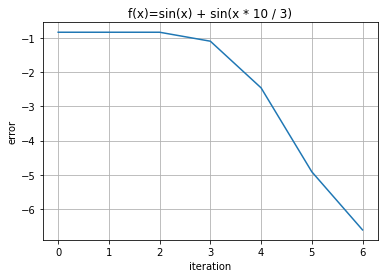

In [12]:
build_plot(optimize_result_3, oracle_3)
plt.show()

In [13]:
f_x_min_3, df_x_min_3 = oracle_3.get_oracle()(optimize_result_3.x_min)
print(
    f"x_local_min = {optimize_result_3.x_min}\n"
    f"f(x_local_min) = {f_x_min_3}\n"
    f"df(x_local_min) = {df_x_min_3}"
)

x_local_min = 5.145735248273363
f(x_local_min) = -1.8995993491521028
df(x_local_min) = -4.218847493575595e-07


2. \begin{equation*}
f(x) = \frac{x^2 - 5x + 6}{x^2 + 1}
\end{equation*}

In [14]:
oracle_4 = continuous.Function15()
left_bound_4 = -100
right_bound_4 = 100
optimize_result_4 = brent.brent_with_derivatives(
    oracle_4.get_oracle(), left_bound_4, right_bound_4, oracle_4.get_eps()
)

График функции:

<img src="../../images/1_problem15.png" width="500px">

Зависимость ошибки от числа итераций:

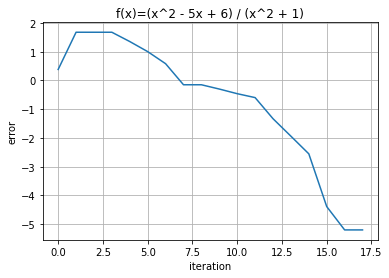

In [15]:
build_plot(optimize_result_4, oracle_4)
plt.show()

In [16]:
f_x_min_4, df_x_min_4 = oracle_4.get_oracle()(optimize_result_4.x_min)
print(
    f"x_local_min = {optimize_result_4.x_min}\n"
    f"f(x_local_min) = {f_x_min_4}\n"
    f"df(x_local_min) = {df_x_min_4}"
)

x_local_min = 2.4142136929882896
f(x_local_min) = -0.03553390593273494
df(x_local_min) = 2.4980018054066022e-08


## Вывод

Алгоритм Брента с использованием производной позволяет найти не только минимум унимодальных функций, но и локальный минимум на отрезке для обычных непрерывных функций.

### Тестирование на всех реализованных функциях

In [17]:
test_samples = [
    (OptimizeParameters(-10, 10), unimodal.Example()),
    (OptimizeParameters(-10, 10), unimodal.Quadratic(5)),
    (OptimizeParameters(0, 10), unimodal.Function4()),
    (OptimizeParameters(-1, 2), unimodal.Function13()),
    (OptimizeParameters(0, 6), unimodal.Function18()),
    (OptimizeParameters(2.7, 7.5), continuous.Function2()),
    (OptimizeParameters(0, 2), continuous.Function5()),
    (OptimizeParameters(-10, 10), continuous.Function6()),
    (OptimizeParameters(0, 10), continuous.Function10()),
    (OptimizeParameters(-5, 5), continuous.Function15())
]

In [18]:
for params, oracle in test_samples:
    test_optimize(brent, params, oracle)

Optimized function: x^2
Reached minimum: x=0.0 (f(x), f'(x) = (0.0, 0.0))
   True minimum: x=0 (f(x), f'(x) = (0.0, 0))
Error: 0
Number of calls to the oracle: 1
Optimization history: 0.0
Optimized function: (x - k)^2
Reached minimum: x=5.0 (f(x), f'(x) = (0.0, 0.0))
   True minimum: x=5 (f(x), f'(x) = (0, 0))
Error: 0
Number of calls to the oracle: 2
Optimization history: 0.0 5.0
Optimized function: -(16x^2 - 24x + 5) * e^{-x}
Reached minimum: x=2.868034 (f(x), f'(x) = (-3.85045070880022, 0.0))
   True minimum: x=2.868034 (f(x), f'(x) = (-3.85045070880022, 0.0))
Error: 0
Number of calls to the oracle: 9
Optimization history: 5.0 2.5 2.5 3.0614353945592416 2.9039610967137066 2.8742904722702804 2.8679073753468693 2.868034401933168
Optimized function: -x^{2/3} - (1 - x^2)^{1/3}
Reached minimum: x=0.70710678 (f(x), f'(x) = (-1.5874010519681994, 0.0))
   True minimum: x=0.7071067811865475 (f(x), f'(x) = (-1.5874010519681994, 0.0))
Error: 0
Number of calls to the oracle: 9
Optimization hist